In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [6]:
# Simulated daily sales data
np.random.seed(42)
days = pd.date_range(start="2022-01-01", end="2023-12-31")
data = pd.DataFrame({
    "date": days,
    "sales": (20 + 5 * np.sin(np.linspace(0, 20, len(days))) +
              np.random.normal(0, 2, len(days))).round().astype(int)
})


In [8]:
# Feature engineering
data['day_of_week'] = data['date'].dt.dayofweek
data['month'] = data['date'].dt.month
data['day_of_month'] = data['date'].dt.day
data['lag_1'] = data['sales'].shift(1)
data['lag_7'] = data['sales'].shift(7)
data['rolling_mean_7'] = data['sales'].rolling(window=7).mean()
data = data.dropna()

In [10]:
# Train/test split
features = ['day_of_week', 'month', 'day_of_month', 'lag_1', 'lag_7', 'rolling_mean_7']
X = data[features]
y = data['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [12]:
# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", round(rmse, 2))

RMSE: 2.06


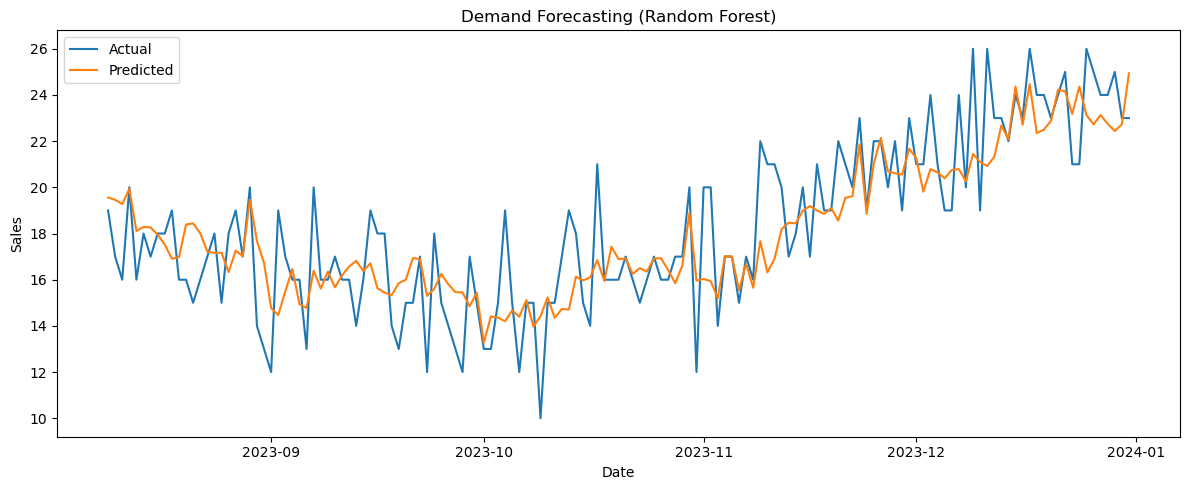

In [14]:
# Plot actual vs predicted
plt.figure(figsize=(12,5))
plt.plot(data['date'][-len(y_test):], y_test.values, label="Actual")
plt.plot(data['date'][-len(y_test):], y_pred, label="Predicted")
plt.title("Demand Forecasting (Random Forest)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()